# Big Data and Analytics MidTerm | Mahir Piyarali

## College Majors; Median Salaries, Gender Breakdowns, Unemployment

The data I chose to use for my midterm was to look at Nate Silver's college major data, and look at salaries and unemployment per job. Additionally I wanted to dive into the gender in STEM issue.

#### Importing Python Packages for Analysis

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Unemployment Rate Compared to Median Salary

Looking around the CSV file, the first thing I wanted to look at was to see the connection between unemployment rate of a job, and the median salary of that job. This was just a preliminary analysis to see if there's any correlation at all.

#### Dataset Preparation

In [73]:
masterdata = pd.read_csv("majormaster.csv",encoding="latin1") #reads in CSV
#masterdata[:3]
unemp = []
sals = []
#appends unemployment rate into a list and median salary into a list
for pct in masterdata["UnemploymentRate"]:
    unemp.append(pct)
for mon in masterdata["MedianSalary"]:
    sals.append(mon)
#masterdata[:3]

#### Data Modeling

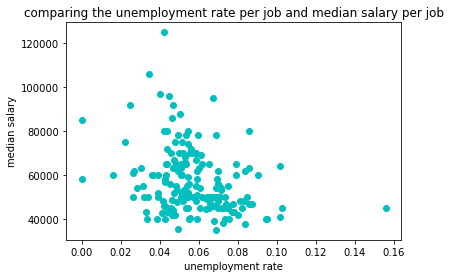

r: -0.301932131912 , rsquared: 0.0911630122809 , slope: -231590.028082


In [74]:
plt.plot(unemp,sals,"co") #unemployment on xaxis, salaries on yaxis
plt.xlabel("unemployment rate")
plt.ylabel("median salary")
plt.title("comparing the unemployment rate per job and median salary per job")
plt.show()
#regressional analysis
x = unemp
y = sals
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value,", rsquared:", r_value**2, ", slope:", slope)

This analysis showed that there wasn't a very strong correlation betweeen unemployment rate and median salary. There's also a big chunk of scatter between 0.02 to 0.1 and 40000 to 80000. With a r-value of -0.3, there isn't a very strong correlation. This shows that the unemployment rate doesn't appear to have a correlation to the median salary of that job. This makes sense too, as there may not be much demand for a job that pays well, and there may be a lot of demand for a job that doesn't pay well (re: teaching). 

## Women in STEM

I also wanted to explore the issue of gender inequality in STEM fields. I wanted to explore just how true the statement "women are underpaid in STEM fields" is, and I wanted to explore the reasons behind why.

### Percent Female vs. Female Median Salary

The first analysis I decided to do was to look at the connection between the percentage of a major that's female (what percent of the people earning the degree is female) and the median salary paid to women. This is to see if more women in a job leads to more/less pay towards women.

#### Dataset Preparation

In [75]:
data = pd.read_csv("comps.csv",encoding="latin1") #reads in new CSV
data.sort_values(["mcode"],inplace=True) #sorts by the "major code"
data[:3]
#appending all of these variables into lists for scatterplots
isomed = []
for mon in data["medsal"]: #median salary
    isomed.append(mon)
wommed = []
for val in data["womsal"]: #women's salary
    wommed.append(val)
menpct = []
for pct in data["pctmen"]: #percent of each job that's male
    menpct.append(pct)
#womenstem[:3]
fempct = []
for pct in data["pctwom"]: #percent of each job that's female
    fempct.append(pct)

#### Data Modeling

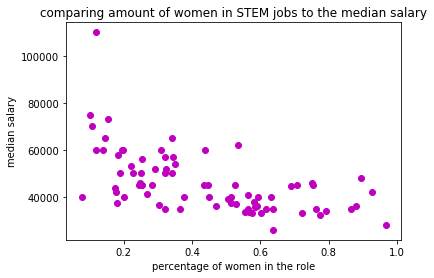

r: -0.582588716107 , rsquared: 0.339409612135 , slope: -33090.1209661


In [76]:
plt.plot(fempct,wommed,"mo") #female percentage on xaxis, women's median salary on yaxis
plt.xlabel("percentage of women in the role")
plt.ylabel("median salary")
plt.title("comparing amount of women in STEM jobs to the median salary")
plt.show()
#regressional analysis
x = fempct
y = wommed
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r:", r_value,", rsquared:", r_value**2, ", slope:", slope)

This scatterplot, along with the -0.58 r-value shows us that as each job has more and more women (the percentage of women in the job) goes up, the median salary for women in that role goes down. Though I can't think of any specific reasons why this would be the case, there's the wage gap with women making 78 cents to every dollar men make. What we're seeing may be a scaled version of that towards salaried jobs.

### Overall Median Salary Per Job vs. Median Salary for Women Per Job

I wanted to explore just how big the pay gap is between men and women in STEM. I wanted to make two scatterplots, one with the overall median salary per job and one with the female median salary per job. I then would set the axes to be the same so I could visualize just how big the gap is. This would be a good way to actually *see* the differences between median salary and what women are making.

#### Dataset Preparation

Same preparation as the analysis above. Used variables created above.

#### Data Modeling

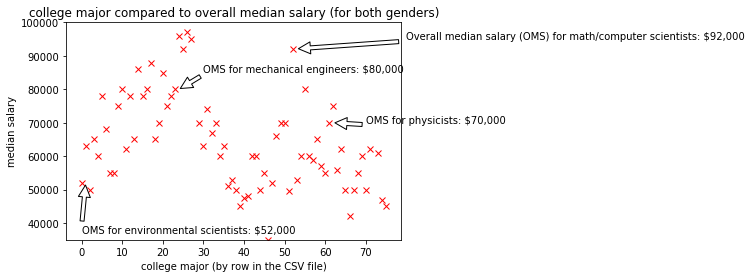

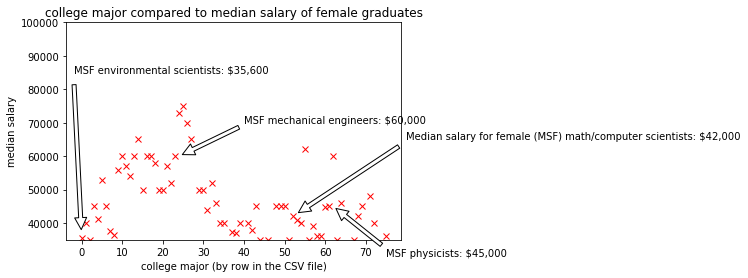

In [77]:
plt.plot(isomed,"rx") #plot the median salary per job
plt.ylim(35000,100000) #set the yaxis limit
plt.xlabel("college major (by row in the CSV file)")
plt.ylabel("median salary")
plt.title("college major compared to overall median salary (for both genders)")
#the following code will draw four arrows, one to each job, and say the median salary for that job
plt.annotate("Overall median salary (OMS) for math/computer scientists: $92,000",xy=(52,92000), 
             #xy= means the coordinate I want the arrow to point to
             xytext=(80,95000),arrowprops=dict(facecolor="white",shrink=0.05)) 
#xytext= where i want the text to start
#arrowprops shows the color of the arrow (facecolor), and the size of the arrow (shrink)
plt.annotate("OMS for physicists: $70,000",xy=(62,70000),
             xytext=(70,70000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("OMS for environmental scientists: $52,000",xy=(1,52000),
             xytext=(0,37000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("OMS for mechanical engineers: $80,000",xy=(24,80000),
             xytext=(30,85000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.show()
plt.plot(wommed,"rx") #plot the female median salary per stem job
plt.xlabel("college major (by row in the CSV file)")
plt.ylabel("median salary")
plt.title("college major compared to median salary of female graduates")
#same annotation code as above, but changing to talk about the median salaries for women in each job
plt.annotate("Median salary for female (MSF) math/computer scientists: $42,000",xy=(52,42000),
             xytext=(80,65000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("MSF physicists: $45,000",xy=(62,45000),
             xytext=(75,30000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("MSF environmental scientists: $35,600",xy=(0,35600),
             xytext=(-2,85000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("MSF mechanical engineers: $60,000",xy=(24,60000),
             xytext=(40,70000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.ylim(35000,100000) #setting yaxis to the same as the above graph
plt.show()

This shows that females in STEM are wildly underpaid compared to their male counterparts. We can see this because a majority of the x marks in the bottom plot are significantly lower than those in the top graphs, which shows that women are paid less per job than a man is.

I also chose four majors at random (environmental sciecne, mechanical engineering, math/computer science and physics), and decided to highlight the differences in specific fields. That isn't to say that there are other margins of pay gap, but I just wanted to relate to four jobs.

### What's The Actual Difference?

I quickly wanted to look at the average difference in salary, to then create the launching pad for my next analysis.

In [78]:
differences = []
for m in data["dif"]:
    differences.append(m)
#differences[:]
avgdif = sum(differences)/len(differences)
print("the average difference in pay between overall salary and women's salaries in STEM is: $",
      (round(avgdif,2)))

the average difference in pay between overall salary and women's salaries in STEM is: $ 19631.58


### Males vs. Females in STEM Workforce by Age

The next thing I wanted to explore was *why* is there such a big difference. With men, on average, making $19,600 more then women do, I thought that the first place to look would be "seniority" in the job. As is expected, when someone has worked longer at a salried job, they make more money. In order to test this, I used the National Science Foundation's study from 2013, comparing the years after graduation to the amount of people employed full-time in a STEM job by gender. 

#### Dataset Preparation

In [79]:
YSGcomp = pd.read_csv("YSG.csv")
YSGcomp[:3]
ysg = []
maleysg = []
fmaleysg = []
totysg = []
for year in YSGcomp["by age"]:
    ysg.append(year)
for men in YSGcomp["male"]:
    maleysg.append(men)
for fem in YSGcomp["female"]:
    fmaleysg.append(fem)
for tot in YSGcomp["total"]:
    totysg.append(tot)

#### Data Modeling

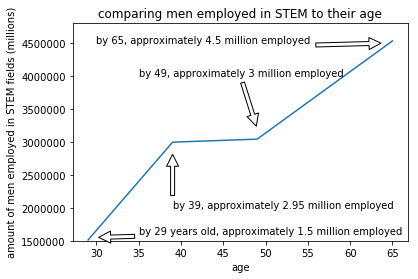

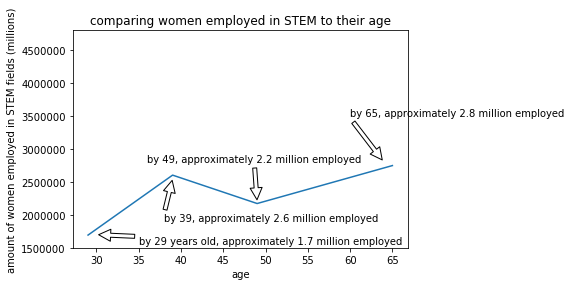

In [80]:
#plotted and annotated using same technique in the last two scatter plots
plt.plot(ysg,maleysg)
plt.ylim(1500000,4800000)
plt.xlabel("age")
plt.ylabel("amount of men employed in STEM fields (millions)")
plt.title("comparing men employed in STEM to their age")
plt.annotate("by 29 years old, approximately 1.5 million employed",xy=(30,1550000),
            xytext=(35,1600000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 39, approximately 2.95 million employed",xy=(39,2850000),
            xytext=(39,2000000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 49, approximately 3 million employed",xy=(49,3200000),
            xytext=(35,4000000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 65, approximately 4.5 million employed",xy=(64,4500000),
            xytext=(30,4500000),arrowprops=dict(facecolor="white",shrink=0.04))
plt.show()
plt.plot(ysg,fmaleysg)
plt.ylim(1500000,4800000)
plt.xlabel("age")
plt.ylabel("amount of women employed in STEM fields (millions)")
plt.title("comparing women employed in STEM to their age")
plt.annotate("by 29 years old, approximately 1.7 million employed",xy=(30,1700000),
            xytext=(35,1550000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 39, approximately 2.6 million employed",xy=(39,2550000),
            xytext=(38,1900000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 49, approximately 2.2 million employed",xy=(49,2200000),
            xytext=(36,2800000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.annotate("by 65, approximately 2.8 million employed",xy=(64,2800000),
            xytext=(60,3500000),arrowprops=dict(facecolor="white",shrink=0.05))
plt.show()

As we look at these graphs, we can see that as age increases, the difference between men and women in STEM increases dramatically. By the age of 60, there are over 2 million more men in STEM jobs compared to women. The data was actually given in increments of "20-29", "30-39" and so on. I rounded up and said "by 29" to account for this, but the numbers may seem a little skewed due to my cleaning of the data.

### How Senior Are Men Compared to Women?

The graphs above show that, with the difference increasing dramatically as age increases, men are more senior than women in the STEM workforce. But I wanted to do a simple mathematical analysis of the data to see how many years (roughly) senior are men compared to women in STEM.

Because the dataset is organized from 20-29, 30-39, etc. To do this analysis, I decided to cut that range in the middle, rounded up. With 20-29 being called 25 years, 30-39 being called 35 and so on. This is just so I could do the analysis simply to get a rough number that may help us understand the pay gap. For the "by 65" column, I decided to do the middle between 50-65, which is 58 (rounded).

#### Dataset Preparation

In [81]:
YSGcomp[:4]
malesen = []
fmalesen = []
for ii in YSGcomp["male"]:
    malesen.append(ii)
for jj in YSGcomp["female"]:
    fmalesen.append(jj)
totmalsen = sum(malesen)
totfmalesen = sum(fmalesen)

#### Data Modeling

In [82]:
#multiplying each age range by their "middle" age
male25 = 25*malesen[0]
male35 = 35*malesen[1]
male45 = 45*malesen[2]
male58 = 58*malesen[3]
#print(male58)
#making a full list of this
malemult = [male25,male35,male45,male58]
#sum of list
summale = sum(malemult)
#same for females
fmale25 = 25*fmalesen[0]
fmale35 = 35*fmalesen[1]
fmale45 = 45*fmalesen[2]
fmale58 = 58*fmalesen[3]
fmalemult = [fmale25,fmale35,fmale45,fmale58]
sumfmale = sum(fmalemult)
#print(sumfmale)
#dividing sum of "years senior" by the total amount of people in STEM total, 
#to average age of male/female stem worker
malesenior = summale/totmalsen
fmalesenior = sumfmale/totfmalesen
print("the average age for a male in STEM is:",round(malesenior))
print("the average age for a female in STEM is:",round(fmalesenior))

the average age for a male in STEM is: 45.0
the average age for a female in STEM is: 42.0


Honestly, this age differnece surprised me. With the average difference in pay being around $19,600, we could expect at least a 5 year difference, but the fact that it's only three years is what's appaling. Granted, however, that this is an extremely rough estimate, this is still a surprising fact that the average age gap is really only three years.

## Conclusions

##### Unemployment vs. Median Salary
There wasn't a correlation between these two variables, and this makes sense. There are a multitude of reasons for a job to have to have a certain unemployment, and the fact that there's a median pay for it doesn't mean more/less people have the job.

##### Percent Female vs. Female Median Salary (in STEM)
There actually was a medium-strong correation (-0.58 r-value) between these two. It appears that as a STEM job has more and more women, the median salary for the women decreases. I can't think of a specific reason(s) that this could be the case.

##### Median Salary per Job vs. Female Median Salary per Job
These two scatter plots show a lot. With them set to the same axes, they do eliminate some of the jobs that are salaried at below 35k and above 100k. Despite this, they show that women are underpaid in every single job. I added a few arrows to show the specific salary gaps for a few jobs. I found this crazy to look at, as we can actually visualize the gap. 

This then sparked me to look at the actual difference, and came to the conclusion that men are paid, on average, $19,600 less than their male coworkers.

##### Women vs. Men in Workforce by Age
After seeing how vast the salary gaps were, I wanted to find a reason towards *why* that was the case. I chose to look at seniorty in the job, to see the age gaps in the work force, and if men have been employed full time in STEM fields for longer than women, and if this difference was enough to justify the $19.6k difference. This data showed that it looks like there are far fewer women employed in STEM than males, especially as the age increases. This made sense in theory, however. STEM has always been seen as a male-dominated field of study, and this data reflected that.

##### What's the Age Seniority
The way I did this analysis, I wanted to find the average age for a male and female STEM worker, to see if the age difference would, in a way, justify for such a difference. The way I did this analysis was taking each age range (20-29) and multiplying the amount of workers in that age range by the median of the age range (20-29; 25). I then took the sum of all of these age-multiplications, and divided them by the total amount of people accounted for in the data. 

This resulted in us seeing that the average male STEM worker is 45 and the average female is 42. This means that, on average, the *extremely rough* age difference is three years. This outraged me, as three years can't justify a $19.6k difference in pay. 

There could've been some bias in this, as my mathematical model for finding the average age gap was extremely rudamentary, but it's still shocking.

### Additional Questions

Sadly, the timeframe for this project prevented me from diving as deep into this issue as I initially wanted to. If I had more time and more data, I would've wanted to look at:
 - The difference in pay of STEM jobs by race
 - The difference in pay of STEM jobs by race *and* gender
 - The differences in amount of people recieving STEM undergrad degrees over the years
 - ^ broken down by race and gender

### Acknowledgements

Data:
 - I got the "masterdata" and the women in STEM data from Nate Silver's fivethirtyeight databases on GitHub
 - I got the age range vs. amount of people data from the National Science foundation's datatables on "Women, Minorities, and Persons with Disabilities in Science and Engineering"
     - https://www.nsf.gov/statistics/2017/nsf17310/data.cfm